In [ ]:
Problem 4

In [1]:
import tensorflow as tf
import numpy as np

input_shape = (1,)
num_neurons = 2

input_layer = tf.keras.layers.Input(shape=input_shape)
hidden_layer = tf.keras.layers.Dense(num_neurons, activation='relu')(input_layer)
output_layer = tf.keras.layers.Dense(1, activation='linear')(hidden_layer)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')

model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2]:
# Parse the data
data = """
6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166
5.7107,3.2522
14.164,15.505
5.734,3.1551
8.4084,7.2258
5.6407,0.71618
5.3794,3.5129
6.3654,5.3048
5.1301,0.56077
6.4296,3.6518
7.0708,5.3893
6.1891,3.1386
20.27,21.767
5.4901,4.263
6.3261,5.1875
5.5649,3.0825
18.945,22.638
12.828,13.501
10.957,7.0467
13.176,14.692
22.203,24.147
5.2524,-1.22
6.5894,5.9966
9.2482,12.134
5.8918,1.8495
8.2111,6.5426
7.9334,4.5623
8.0959,4.1164
5.6063,3.3928
12.836,10.117
6.3534,5.4974
5.4069,0.55657
6.8825,3.9115
11.708,5.3854
5.7737,2.4406
7.8247,6.7318
7.0931,1.0463
5.0702,5.1337
5.8014,1.844
11.7,8.0043
5.5416,1.0179
7.5402,6.7504
5.3077,1.8396
7.4239,4.2885
7.6031,4.9981
6.3328,1.4233
6.3589,-1.4211
6.2742,2.4756
5.6397,4.6042
9.3102,3.9624
9.4536,5.4141
8.8254,5.1694
5.1793,-0.74279
21.279,17.929
14.908,12.054
18.959,17.054
7.2182,4.8852
8.2951,5.7442
10.236,7.7754
5.4994,1.0173
20.341,20.992
10.136,6.6799
7.3345,4.0259
6.0062,1.2784
7.2259,3.3411
5.0269,-2.6807
6.5479,0.29678
7.5386,3.8845
5.0365,5.7014
10.274,6.7526
5.1077,2.0576
5.7292,0.47953
5.1884,0.20421
6.3557,0.67861
9.7687,7.5435
6.5159,5.3436
8.5172,4.2415
9.1802,6.7981
6.002,0.92695
5.5204,0.152
5.0594,2.8214
5.7077,1.8451
7.6366,4.2959
5.8707,7.2029
5.3054,1.9869
8.2934,0.14454
13.394,9.0551
5.4369,0.61705
"""

# Convert the string data into a numpy array
data_array = np.array([[float(x) for x in row.split(',')] for row in data.strip().split('\n')])

# Separate features (X) and target variable (y)
X = data_array[:, :-1]  # Features are all columns except the last one
y = data_array[:, -1]   # Target variable is the last column

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and test sets
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Test set - X:", X_test.shape, "y:", y_test.shape)


Training set - X: (67, 1) y: (67,)
Test set - X: (30, 1) y: (30,)


In [3]:
# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)

print("Test Loss:", loss) 


Epoch 1/100

3/3 [==============================] - 1s 108ms/step - loss: 60.8121 - val_loss: 57.1127
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 63.7832 - val_loss: 53.4326
Epoch 3/100
3/3 [==============================] - 0s 25ms/step - loss: 59.9591 - val_loss: 50.4951
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 56.8771 - val_loss: 47.6206
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 53.8782 - val_loss: 45.1907
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 51.3137 - val_loss: 43.1032
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 49.0731 - val_loss: 40.4270
Epoch 8/100
3/3 [==============================] - 0s 24ms/step - loss: 46.3103 - val_loss: 39.2809
Epoch 9/100
3/3 [==============================] - 0s 22ms/step - loss: 45.0368 - val_loss: 38.0544
Epoch 10/100
3/3 [==============================] - 0s 23ms/step - loss: 43.7396 - val_loss: 37.42

3/3 [==============================] - 0s 19ms/step - loss: 31.1568 - val_loss: 27.7007
Epoch 81/100
3/3 [==============================] - 0s 22ms/step - loss: 31.1700 - val_loss: 27.6863
Epoch 82/100
3/3 [==============================] - 0s 20ms/step - loss: 31.1559 - val_loss: 27.6960
Epoch 83/100
3/3 [==============================] - 0s 20ms/step - loss: 31.1570 - val_loss: 27.6688
Epoch 84/100
3/3 [==============================] - 0s 20ms/step - loss: 31.1612 - val_loss: 27.6504
Epoch 85/100
3/3 [==============================] - 0s 20ms/step - loss: 31.1603 - val_loss: 27.7735
Epoch 86/100
3/3 [==============================] - 0s 21ms/step - loss: 31.1765 - val_loss: 27.7221
Epoch 87/100
3/3 [==============================] - 0s 19ms/step - loss: 31.1619 - val_loss: 27.6821
Epoch 88/100
3/3 [==============================] - 0s 21ms/step - loss: 31.1596 - val_loss: 27.6291
Epoch 89/100
3/3 [==============================] - 0s 21ms/step - loss: 31.1493 - val_loss: 27.6182
Epo

In [4]:
import numpy as np

def predict_house_price(model, population):
    # Reshape the population value to match the input shape of the model
    population_input = np.array([[population]])
    
    # Predict the price using the trained model
    predicted_price = model.predict(population_input)
    
    return predicted_price[0][0]

population = 16.5
predicted_price = predict_house_price(model, population)
print("Predicted price of the house:", predicted_price)


1/1 [==============================] - 0s 63ms/step
Predicted price of the house: 5.924747


### The predicted price of a house in an area with population 165,000 is $59,096.07

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the MSE using the true prices (y_test) and the predicted prices (y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test set:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

1/1 [==============================] - 0s 20ms/step
Mean Squared Error (MSE) on test set: 27.619278510059125
Mean Absolute Error (MAE): 4.058959330067952


### Useful regression metrics: MSE = 27.6 , MAE = 4.05

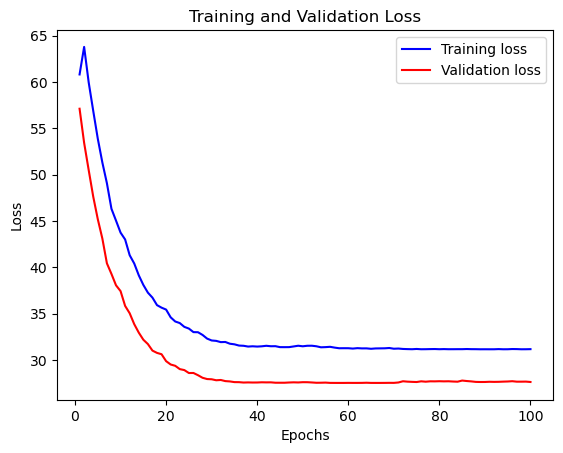

In [6]:
import matplotlib.pyplot as plt

# Get the training and validation losses from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the training and validation losses
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


 ### I used 100 epochs and 0.01 learning rate. Initially, the training and validation losses decrease rapidly, indicating that the model is learning quickly. However, as the training progresses, the rate of decrease in training and validation losses slow down and finally plateau, indicating that the model is converging towards a solution. 